# Solving the n-Queens Problem using Local Search

Student Name: Blake Gebhardt

I have used the following AI tools: Good ole ChatGPT helped me with syntax. I would ask it to help simplify or streamline my code and it would just straight up break it.

I understand that my submission needs to be my own work: bWG

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 


## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum. 

## Helper functions

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""
    
    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""

    n = len(board)
    
    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n
    
    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1
    
    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

# decrease the fontsize to fit larger boards
def show_board(board, cols = ['white', 'gray'], fontsize = 48):  
    """display the board"""
    
    n = len(board)
    
    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0): 
                display[i,j] = 1
    
    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap, 
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])
    
    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize, 
                 horizontalalignment = 'center',
                 verticalalignment = 'center')
    
    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


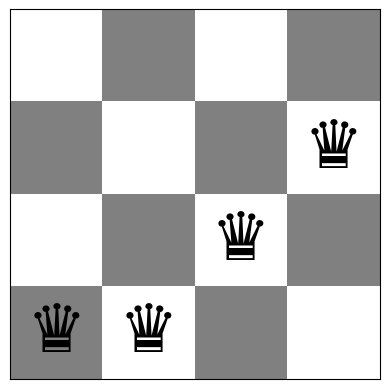

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [22]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


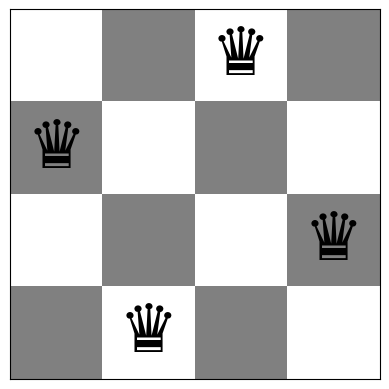

In [23]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [30 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum. 

In [24]:
def get_best_local_move(current_board):
    

    board_size = len(current_board)
    current_conflicts = conflicts(current_board)
    best_move = []

    # Loop over all down moves, see if its better
    for row in range(board_size):
        # Create a copy of the current board state
        newMove = current_board.copy()

        # Move the queen down in the current row while checking for conflicts
        while newMove[row] > 0:
            newMove[row] = newMove[row] - 1

            # If the new state has fewer conflicts, update the best move
            if conflicts(newMove) < current_conflicts:
                best_move = newMove.copy()
                current_conflicts = conflicts(newMove)
    
    # Loop over all up moves
    for row in range(board_size):
        # Create a copy of the current board state
        newMove = current_board.copy()

        # Move the queen up in the current row while checking for conflicts
        while newMove[row] < board_size - 1:
            newMove[row] = newMove[row] + 1

            # If the new state has fewer conflicts, update the best move
            if conflicts(newMove) < current_conflicts:
                best_move = newMove.copy()
                current_conflicts = conflicts(newMove)

    # Return the best move found
    return best_move


In [25]:
def steepest_ascent_hill_climbing(board):
    # Set the current board and current conflicts
    current_board = board.copy()
    current_conflicts = conflicts(current_board)

    # Loop until we find a local minimum
    best_move = get_best_local_move(current_board)
    while len(best_move) > 0:
      current_board = best_move.copy()
      current_conflicts = conflicts(best_move)
      best_move = get_best_local_move(current_board)

    # Return the best board
    return current_board

Board with 8 conflicts.


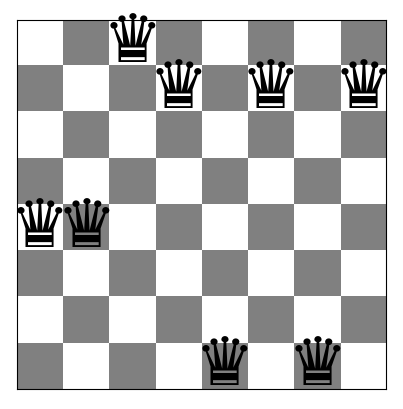

Board with 2 conflicts.


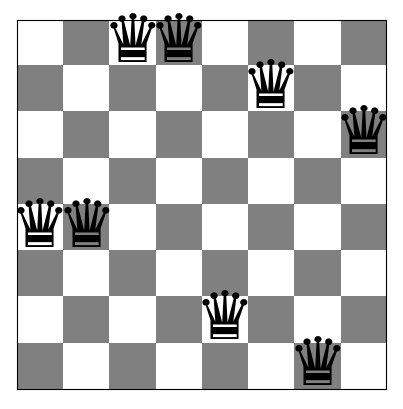

In [26]:
# Get a random board
board = random_board(8)

# Print the original board
show_board(board)

# Run the algorithm on a random board
board = steepest_ascent_hill_climbing(board)

# Print the after board
show_board(board)

## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

In [27]:
import random

def get_all_best_local_moves(current_board):

    size = len(current_board)
    current_conflicts = conflicts(current_board)
    best_moves = []

    # Loop over all down moves
    for row in range(size):
      new_board = current_board.copy()
      while new_board[row] > 0:
        new_board[row] = new_board[row] - 1
        if conflicts(new_board) < current_conflicts:
          best_move = new_board.copy()
          current_conflicts = conflicts(new_board)
          break
        elif conflicts(new_board) == current_conflicts:
          best_moves.append(new_board.copy())

    # Loop over all up moves
    for row in range(size):
      new_board = current_board.copy()
      while new_board[row] < size - 1:
        new_board[row] = new_board[row] + 1
        if conflicts(new_board) < current_conflicts:
          best_move = new_board.copy()
          current_conflicts = conflicts(new_board)
          break
        elif conflicts(new_board) == current_conflicts:
          best_moves.append(new_board.copy())


    

    return best_moves


In [28]:
def stochastic_hill_climbing(board):
    # Set the current board and current conflicts
    current_board = board.copy()
    current_conflicts = conflicts(current_board)

    #print("Starting board:", board)

    
    # Loop until we find a local minimum
    while True:
        best_moves = get_all_best_local_moves(current_board)

        if not best_moves:
            break

        # Choose a random move from the best moves
        current_board = random.choice(best_moves)

        # Print the randomly decided move
        #commented to keep it normal for html
        #print("Random move:", current_board)


    # Return the best board
    return current_board


Board with 8 conflicts.


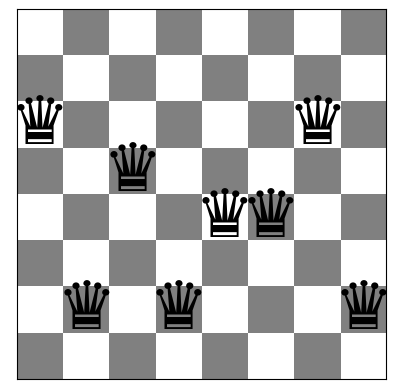

Board with 2 conflicts.


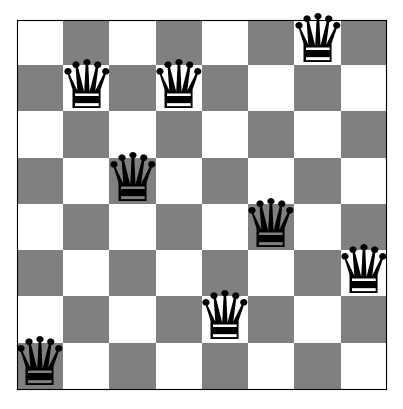

In [29]:
# Get a random board
board = random_board(8)

# Print the original board
show_board(board)

# Run the algorithm on a random board
board = stochastic_hill_climbing(board)

# Print the after board
show_board(board)

## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__ 

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

In [30]:
def get_first_better_local_move(current_board):

    size = len(current_board)
    current_conflicts = conflicts(current_board)

    # Loop over all down moves
    for row in range(size):
      newArr = current_board.copy()
      while newArr[row] > 0:
        newArr[row] = newArr[row] - 1
        if conflicts(newArr) < current_conflicts:
          return newArr
    
    # Loop over all up moves
    for row in range(size):
      newArr = current_board.copy()
      while newArr[row] < size - 1:
        newArr[row] = newArr[row] + 1
        if conflicts(newArr) < current_conflicts:
          return newArr

    return []


In [31]:
def better_stochastic(board):
    # Set the current board and current conflicts
    current_board = board.copy()
    current_conflicts = conflicts(current_board)

    #print("Starting board:", board)
    # Loop until we find a local minimum
    best_move = get_first_better_local_move(current_board)
    while len(best_move) > 0:
        # Print the selected move
        #commented out to keep html pretty
        #print("Selected move:", best_move)
        current_board = best_move.copy()
        best_move = get_first_better_local_move(current_board)

    # Return the best board
    return current_board


Board with 7 conflicts.


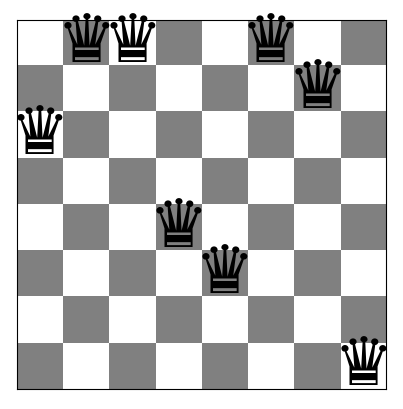

Board with 1 conflicts.


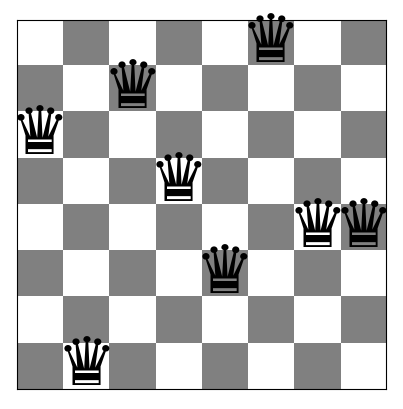

In [32]:
# Get a random board
board = random_board(8)

# Print the original board
show_board(board)

# Run the algorithm on a random board
board = better_stochastic(board)

# Print the after board
show_board(board)

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algorithm several times starting with a new random board.

In [33]:
# Code and description go here
def random_restart(size, max_tries):
    # Loop up to max_tries times
    current_optimal = random_board(size)
    current_conflicts = conflicts(current_optimal)

    for _ in range(max_tries):

      # Break if we have optimal solution
      if current_conflicts == 0:
        break

      # Get a random board
      board = random_board(size)
      #print("NEW RANDOM BOARD")

      # Run the algorithm on a random board
      board = better_stochastic(board)

      # Check if the board is better
      if conflicts(board) < current_conflicts:
        current_optimal = board.copy()
        current_conflicts = conflicts(board)
      

    # Return the best board
    return current_optimal

Board with 5 conflicts.


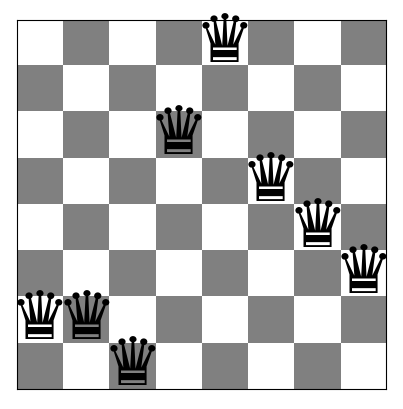

Board with 0 conflicts.


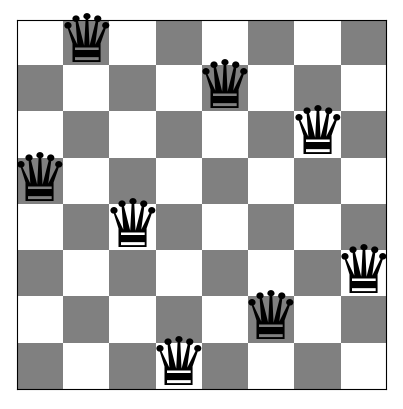

In [34]:
# Get a random board
board = random_board(8)

# Print the original board
show_board(board)

# Run the algorithm on a random board
board = random_restart(len(board), 100)

# Print the after board
show_board(board)


## Task 5: Simulated Annealing [10 Points]

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Compare the performance with the previous algorithms. 
2. Discuss your choice of annealing schedule.

In [35]:
# Code and description go here

import math

def simulated_annealing(initial_board, max_tries, initial_temperature, cooling_rate):
    current_optimal = initial_board.copy()
    current_conflicts = conflicts(current_optimal)

    for _ in range(max_tries):
        if current_conflicts == 0:
            break

        board = random_board(len(initial_board))
        current_cost = conflicts(current_optimal)
        new_cost = conflicts(board)
        cost_difference = new_cost - current_cost

        if cost_difference < 0:
            current_optimal = board.copy()
            current_conflicts = new_cost
        else:
            probability = math.exp(-cost_difference / initial_temperature)
            if random.random() < probability:
                current_optimal = board.copy()
                current_conflicts = new_cost

        initial_temperature *= cooling_rate

    return current_optimal

Board with 7 conflicts.


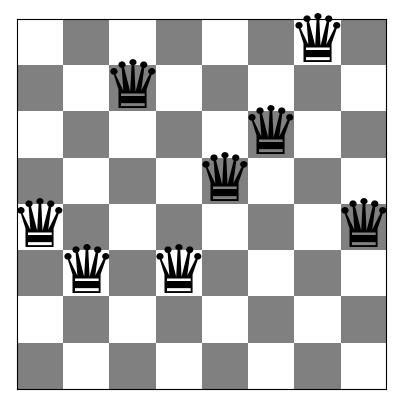

Board with 2 conflicts.


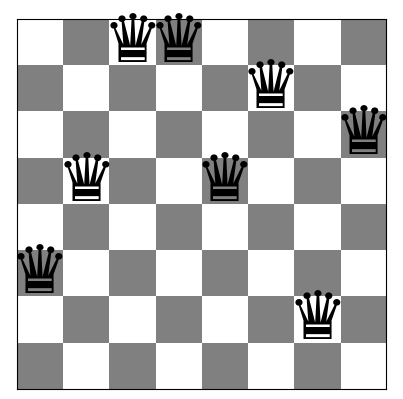

In [36]:
# Get a random board
board = random_board(8)

# Print the original board
show_board(board)

# Run the algorithm on a random board
#I just picked random values for each, these seem to be pretty good
board = simulated_annealing(board, 1000, 10, .99)

# Print the after board
show_board(board)


## Task 6: Compare Performance [10 Points]

Use runtime and objective function value to compare the algorithms. 

* Use boards of different sizes to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 10 times) with different starting boards and report averages.

* How do the algorithms scale with problem size? Use tables and charts.

* What is the largest board each algorithm can solve in a reasonable amount time?

See [Profiling Python Code](../HOWTOs/profiling_code.ipynb) for help about how to measure runtime in Python.

In [38]:
import timeit

board_sizes = [4, 8, 10, 15, 20, 25]
steepest_ascent_hill_climbing_times = []
stochastic_hill_climbing_times = []
better_stochastic_times = []
hill_climbing_random_restart_times = []
sim_anneal_times = []

# Run the algorithms on a range of board sizes
for size in board_sizes:
  run_steepest_ascent_hill_climbing = timeit.timeit(lambda: steepest_ascent_hill_climbing(random_board(size)), number=3)
  run_stochastic_hill_climbing = timeit.timeit(lambda: stochastic_hill_climbing(random_board(size)), number=3)
  run_better_stochastic = timeit.timeit(lambda: better_stochastic(random_board(size)), number=3)
  run_hill_climbing_random_restart = timeit.timeit(lambda: random_restart(size, 100), number=3)
  run_sim_annealing = timeit.timeit(lambda: simulated_annealing(random_board(size), 1000, 10, .99), number=3)
  
  steepest_ascent_hill_climbing_times.append(run_steepest_ascent_hill_climbing)
  stochastic_hill_climbing_times.append(run_stochastic_hill_climbing)
  better_stochastic_times.append(run_better_stochastic)
  hill_climbing_random_restart_times.append(run_hill_climbing_random_restart)
  sim_anneal_times.append(run_sim_annealing)

# Print the results
print("Steepest Ascent Hill Climbing Times: ", steepest_ascent_hill_climbing_times)
print("Stochastic Hill Climbing Times: ", stochastic_hill_climbing_times)
print("Better Stochastic Times: ", better_stochastic_times)
print("Hill Climbing Random Restart Times: ", hill_climbing_random_restart_times)
print("Sim Annealing Times: ", sim_anneal_times)


Steepest Ascent Hill Climbing Times:  [0.0014537270180881023, 0.013018125959206372, 0.026978826033882797, 0.12300297402543947, 0.3122038450092077, 1.0736704170121811]
Stochastic Hill Climbing Times:  [0.00810963596450165, 0.13113608601270244, 0.2665685070096515, 1.982929096033331, 12.791887844970915, 3.8463333360268734]
Better Stochastic Times:  [0.0013038450269959867, 0.007312014990020543, 0.01458205800736323, 0.07453809701837599, 0.16716384899336845, 0.45430575002683327]
Hill Climbing Random Restart Times:  [0.005568504973780364, 0.030420606955885887, 0.28130087797762826, 2.180657605989836, 3.3910871780244634, 18.39373708399944]
Sim Annealing Times:  [0.00450914801331237, 0.13425180304329842, 0.14866149798035622, 0.2062545460066758, 0.3180282560060732, 0.2835509160067886]


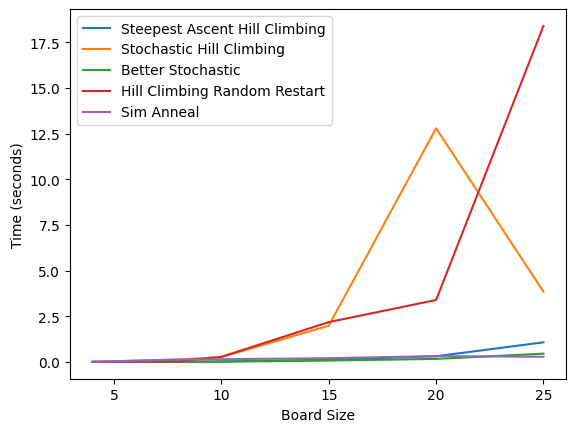

In [39]:
# Plot the results
import matplotlib.pyplot as plt

plt.plot(board_sizes, steepest_ascent_hill_climbing_times, label="Steepest Ascent Hill Climbing")
plt.plot(board_sizes, stochastic_hill_climbing_times, label="Stochastic Hill Climbing")
plt.plot(board_sizes, better_stochastic_times, label="Better Stochastic")
plt.plot(board_sizes, hill_climbing_random_restart_times, label="Hill Climbing Random Restart")
plt.plot(board_sizes, sim_anneal_times, label="Sim Anneal")

plt.xlabel("Board Size")
plt.ylabel("Time (seconds)")
plt.legend()
plt.show()

# Analysis
As the size of the board increases, the time taken by the algorithms to find the solution increases. 

Among the algorithms tested, Steepest-Ascent Hill Climbing and Better Stochastic tend to perform faster in terms of execution time. This is likely due to the nature of these algorithms:
Better Stochastic stops as soon as it finds a better local move, which can lead to a quicker termination when a good move is found early.
Steepest-Ascent Hill Climbing, while not guaranteed to find the global optimum, may have found a good solution early in some runs, making it terminate faster. However, this is somewhat dependent on the initial board configuration.

Stochastic Hill Climbing and Hill Climbing with Random Restart tend to take more time. This could be because they involve a degree of randomness:
Stochastic Hill Climbing explores random moves, and the time taken may vary depending on the sequence of random moves and the quality of initial random boards.

Hill Climbing with Random Restart repeatedly starts the algorithm with random boards. It's possible that, in some runs, it selects less favorable random boards, leading to longer execution times. Random Restart may have just picked the wrong random board, which is just how things are with random selections.

The graph above shows the time taken for each algorithm to run three times.
I tried sizes of 4, 8, 10, 15, 20, and 25. I tried 50 but I stopped it after 3 minutes. I don't think it'll stop in a normal amount of time.

## Graduate student advanced task: Exploring other Local Moves [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

Implement a few different local moves. Implement:

* moving a queen only one square at a time
* switching two columns
* more moves which move more than one queen at a time. 

Compare the performance of these moves for the 8-Queens problem using your stochastic hill climbing 2 implementation from above. Also consider mixing the use of several types of local moves (e.g., move one queen and moving two queens).

Describe what you find out about how well these moves and combinations of these moves work.

In [ ]:
# Code and description go here

## More things to do

Implement a Genetic Algorithm for the n-Queens problem.

In [ ]:
# Code and description go here